In [1]:
import os, fnmatch, sys
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#dir_path = '/Users/adel.schmucklermann/Desktop/test/data'
dir_path = './bmrb/bmrb_entries'


In [5]:
#plot = 'violin' #'boxplot'
#sns.set(font_scale=2)

In [12]:
def find(name, path):
    path_list = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if fnmatch.fnmatch(file, name):
                path_list.append(os.path.join(root, file))
    return path_list

path_list = find('*_3.str', dir_path)
#print(path_list)

['/Users/adel.schmucklermann/Desktop/test/data/bmr7_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr36133_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr18566_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr4224_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr17611_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr3_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr5961_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr4757_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr16926_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr11136_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr1865_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr18083_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr27478/bmr27478_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr18851/bmr18851_3.str', '/Users/adel.schmucklermann/Desktop/test/data/bmr25582/bmr25582_3.str', '/Users/adel.schmucklermann/Desktop/tes

In [6]:
AA_list = ["ala","cys", "asp", "glu", "phe", "gly", "his", "ile", "lys", "leu", "met", "asn", "pro", "gln", "arg", 
           "ser", "thr", "val", "trp", "tyr","a","r","n","d", "c","e","q","g","h","i",
           "l","k","m","f","p","s","t","w","y","v" ] 
#"cit", "hyp", "orn", "b‐ala","a","r","n","d", "c","e","q","g","h","i",
#           "l","k","m","f","p","s","t","w","y","v"]

aa_list = ["a","r","n","d", "c","e","q","g","h","i",
           "l","k","m","f","p","s","t","w","y","v"]

aa_dict = {"a":"ALA", "r": "ARG", "n":"ASN", "d":"ASP", "c":"CYS", "e":"GLU", "q":"GLN", "g":"GLY","h":"HIS",
           "i":"ILE","l":"LEU","k":"LYS","m":"MET", "f":"PHE","p":"PRO", "s":"SER","t":"THR","w":"TRP",
          "y":"TYR", "v":"VAL"} 

In [7]:
def put_residue_in_dict(dictionary, residue, shift):

    if residue not in dictionary:
        dictionary[residue] = [shift]
    else:
        shift_list = dictionary[residue]
        shift_list.append(shift)
        dictionary[residue] = shift_list
    
    return dictionary

In [15]:
residue_H_dict = {} #{residue: shifts}
residue_N_dict = {}

can_residue_H_dict = {} #{canonical_residue: shifts}
can_residue_N_dict = {}

n_peaks_H_dict = {} #{residue: number of peaks}
n_peaks_N_dict = {}

counter = 0
counter_all = 0
counter_hsqc = 0

counter_non_canonical = 0
counter_canonical = 0

counter_non_canonical_hsqc = 0
counter_canonical_hsqc = 0

counter_non_canonical_h_n = 0
counter_canonical_h_n = 0

missing_atom_shift_table = 0

empty_n_h_list = 0
empty_n = 0
empty_h = 0
empty_both = 0


polymer_dict = {}
polypeptide_L_list = []

available_IDs = []



for path in path_list:
    
    counter_all = counter_all +1
    #print(path.split("/")[-1])
    
    
    non_canonical_protein = False
    hsqc = False
    
    f = path.split("/")[-1]
    
    #if f.split("_")[0][3:] != '17611':
    #    continue
    
    
    
    with open(path, 'r') as file:
        data = file.read().split("\n")
        index = 0
        index_start = 0
        polymer = False  
        pol_entry_ID = "None"
        

        for line in data:
            match = re.findall(r'2D 1H-15N HSQC', line)
            if match:
                #index = data.index(line)
                hsqc = True
                
                
            match_polymer = re.findall(r'\s*_Entity.Type\s*polymer$', line)
            if match_polymer:
                polymer = True
                
                match_polymer = re.findall(r'\s*_Entity.Polymer_type\s',line)
                if match_polymer:
                    split_line = line.split()
                    pol_entry = split_line[1]
                    
                    
                    
                    if pol_entry == 'polypeptide(L)':
                        polypeptide_L_list.append(f)
                    
                    if pol_entry in polymer_dict:
                        polymer_dict[pol_entry].add(f)

                    else:
                        polymer_dict[pol_entry] = {f}
                        
                    polymer = False
                       
                    
                match_polymer_ID = re.findall(r'\s*_Entity.Polymer_strand_ID\s',line)
                if match_polymer_ID:
                    split_line = line.split()
                    pol_entry_ID = split_line[1]
                
                
                
            match2 = re.match(r'\s*_Atom_chem_shift.ID$',line)
            if match2:
                index_start = data.index(line)
                #break;
                

            if index_start != 0: 
            #for line in data[index_start+1:]:
                match_0 = re.match(r'\s* _Atom_chem_shift.Seq_ID$',line)
                if match_0:
                    residue_id_index = data.index(line)
                    residue_id_i = residue_id_index - index_start
                    #print(residue_id_i)


                match_1 = re.match(r'\s*_Atom_chem_shift.Comp_ID$',line)
                if match_1:
                    residue_index = data.index(line)
                    residue_i = residue_index - index_start
                    #print(residue_i)

                match_2 = re.match(r'\s*_Atom_chem_shift.Atom_ID$',line)
                if match_2:
                    atom_index = data.index(line)
                    atom_i = atom_index - index_start

                match_3 = re.match(r'\s*_Atom_chem_shift.Val$',line)
                if match_3:
                    shift_index = data.index(line)
                    shift_i = shift_index - index_start
                    
                match_4 = re.match(r'\s*_Atom_chem_shift.Auth_asym_ID$',line)
                if match_4:
                    peptide_index = data.index(line)
                    peptide_i = peptide_index - index_start

                match_end = re.match(r'\s*_Atom_chem_shift.Assigned_chem_shift_list_ID$',line)
                if match_end:
                    index = data.index(line)
                    #print(line)
                    break;



        H_shifts = {}
        N_shifts = {}
        
        H_shifts_tmp = {}
        N_shifts_tmp = {}
        
        can_H_shifts = {}
        can_N_shifts = {}
        
        H_temp = 0  #Assumption: only one H/N value per residue_index
        N_temp = 0
        res_id_temp = "-2"
        residue_temp = "tmp"

        
        #print(f)

        if index != 0:
            for line in data[index+2:]:

                l = line.split()

                #print(l)
    

                if len(l) == 1:
                    if res_id_temp != "-2":

                        if H_temp != 0 and N_temp != 0 and (peptide_temp == "." or peptide_temp == pol_entry_ID):
                            #print(residue_temp+": "+str(N_temp)+", "+str(H_temp))

                            if residue_temp.lower() not in AA_list:
                                non_canonical_protein = True
                            else:
                                can_N_shifts = put_residue_in_dict(can_N_shifts, residue_temp, N_temp)
                                can_H_shifts = put_residue_in_dict(can_H_shifts, residue_temp, H_temp) 
                            
                            
                            N_shifts = put_residue_in_dict(N_shifts, residue_temp, N_temp)
                            H_shifts = put_residue_in_dict(H_shifts, residue_temp, H_temp) 
                            
                            
                        if H_temp > 0:
                            H_shifts_tmp = put_residue_in_dict(H_shifts_tmp, residue_temp, H_temp)
                                
                        if N_temp > 0:
                            N_shifts_tmp = put_residue_in_dict(N_shifts_tmp, residue_temp, N_temp)

                    break

                else:
                    if len(l) >= 12:

                        residue_id = l[residue_id_i]
                        residue = l[residue_i]
                        atom = l[atom_i]
                        shift = float(l[shift_i])
                        peptide = l[peptide_i]

                        if res_id_temp == "-2":
                            res_id_temp = residue_id
                            residue_temp = residue
                            peptide_temp = peptide
                        

                        if residue.lower() in aa_list:
                            residue = aa_dict[residue.lower()] 

                            
                        
                        if residue_id != res_id_temp:


                            if H_temp != 0 and N_temp != 0 and (peptide_temp == "." or peptide_temp == pol_entry_ID):
                                #print(peptide_temp) 
                                #print(pol_entry_ID)

                                #print(l)
                                #print(atom)
                                #print(shift)
                                #print(residue_temp.lower()+": "+str(N_temp)+", "+str(H_temp))

                                if residue_temp.lower() not in AA_list:
                                    non_canonical_protein = True
                                else:
                                    can_N_shifts = put_residue_in_dict(can_N_shifts, residue_temp, N_temp)
                                    can_H_shifts = put_residue_in_dict(can_H_shifts, residue_temp, H_temp) 

                                N_shifts = put_residue_in_dict(N_shifts, residue_temp, N_temp)
                                H_shifts = put_residue_in_dict(H_shifts, residue_temp, H_temp)
                                
                                H_temp = 0
                                N_temp = 0
                            
                            
                            if H_temp > 0:
                                H_shifts_tmp = put_residue_in_dict(H_shifts_tmp, residue_temp, H_temp)
                                
                            if N_temp > 0:
                                N_shifts_tmp = put_residue_in_dict(N_shifts_tmp, residue_temp, N_temp)
                                
                                
                            res_id_temp = residue_id
                            residue_temp = residue
                            
                                

                        if atom == "H":
                            H_temp = shift


                        if atom == "N":
                            N_temp = shift

                    
        
        else:
            #print("_Atom_chem_shift.ID/ Index is zero "+path.split("/")[-1])
            missing_atom_shift_table = missing_atom_shift_table +1
    
            
    if len(N_shifts) > 0 and len(H_shifts) > 0:
        #print(f.split("_")[0][3:])
        #print(H_shifts)
        #print(N_shifts)

        available_IDs.append(f.split("_")[0][3:])

        counter = counter + 1
        
        if non_canonical_protein:
            counter_non_canonical_h_n = counter_non_canonical_h_n +1

        else:
            counter_canonical_h_n = counter_canonical_h_n +1
            #print(path.split("/")[-1])
        

        residue_H_dict = {key:H_shifts.get(key,[])+residue_H_dict.get(key,[]) for key in set(list(H_shifts.keys())+list(residue_H_dict.keys()))}
        residue_N_dict = {key:N_shifts.get(key,[])+residue_N_dict.get(key,[]) for key in set(list(N_shifts.keys())+list(residue_N_dict.keys()))}
        
        can_residue_H_dict = {key:can_H_shifts.get(key,[])+can_residue_H_dict.get(key,[]) for key in set(list(can_H_shifts.keys())+list(can_residue_H_dict.keys()))}
        can_residue_N_dict = {key:can_N_shifts.get(key,[])+can_residue_N_dict.get(key,[]) for key in set(list(can_N_shifts.keys())+list(can_residue_N_dict.keys()))}


        n_peaks_H_dict = {key: len(value) for key,value in H_shifts.items()}
        n_peaks_N_dict = {key: len(value) for key,value in N_shifts.items()}
        
    else:
        
        
        
        #if f in polypeptide_L_list:
            #print("N/H list is empty from polypeptide(L): "+path.split("/")[-1])
            
            
        empty_n_h_list = empty_n_h_list +1
            
            
        if len(N_shifts_tmp) == 0 and len(H_shifts_tmp) == 0:
            empty_both = empty_both +1
            
        else: 
            if len(N_shifts_tmp) == 0:
                empty_n = empty_n +1
            if len(H_shifts_tmp) == 0:
                empty_h = empty_h +1
            
            
        #if len(N_shifts) == 0 and len(H_shifts) == 0:
        #    empty_both = empty_both +1
            
            
    """if hsqc:
        counter_hsqc = counter_hsqc +1
        if non_canonical_protein:
            counter_non_canonical_hsqc = counter_non_canonical_hsqc +1

        else:
            counter_canonical_hsqc = counter_canonical_hsqc +1

    else:
        if non_canonical_protein:
            counter_non_canonical = counter_non_canonical +1
        else:
            counter_canonical = counter_canonical +1"""
    #print(path.split("/")[-1]+": "+str(hsqc)+", "+str(non_canonical_protein))

                
                              
                
                
            
        
"""print("\ncounter_proteins_with_H/N: "+str(counter))
print("counter_canonical_protein_h_n: "+str(counter_canonical_h_n))
print("counter_non_canonical_protein_h_n: "+str(counter_non_canonical_h_n)+"\n")

print("counter_non_hsqc: "+str(counter_all-counter_hsqc))
print("counter_canonical_protein: "+str(counter_canonical))
print("counter_non_canonical_protein: "+str(counter_non_canonical)+"\n")

print("counter_hsqc: "+str(counter_hsqc))
print("counter_canonical_protein_hsqc: "+str(counter_canonical_hsqc))
print("counter_non_canonical_protein_hsqc: "+str(counter_non_canonical_hsqc)+"\n")


print("counter_all: "+str(counter_all)+"\n")

print("missing_atom_shift_table: "+str(missing_atom_shift_table)+"\n")

print("empty_n_h_list: "+str(empty_n_h_list))
print("empty_both: "+str(empty_both))
print("empty_n: "+str(empty_n))
print("empty_h: "+str(empty_h)+"\n")
"""


#print(polymer_dict)

#print(residue_N_dict.keys())
#print(residue_H_dict.keys())
#print(can_residue_N_dict.keys())
#print(can_residue_H_dict.keys())


file = open('./bmrb_hn_list_update.txt', 'w')
file.write("BRMB_ID"+"\n")
for ID in available_IDs:
    file.write(ID+"\n")
file.close()


.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None
.
None

In [209]:
# 6985 of 15860 found for H-N HSQC 
# 6873
#bmr17907_3.str

In [417]:
def get_violinplot(dictionary, atomshift, output):
    
    fig, ax = plt.subplots()

    positions = list(range(0, len(dictionary)))
    ax.violinplot(dictionary.values(), positions)
    plt.xticks(positions, dictionary.keys())

    fig.set_size_inches(25, 10.5)
    plt.ylabel(atomshift)
    plt.rcParams.update({'font.size': 17})
    plt.title(atomshift+" of HSQC Data from BMRB")

    fig.savefig(output, dpi=100)

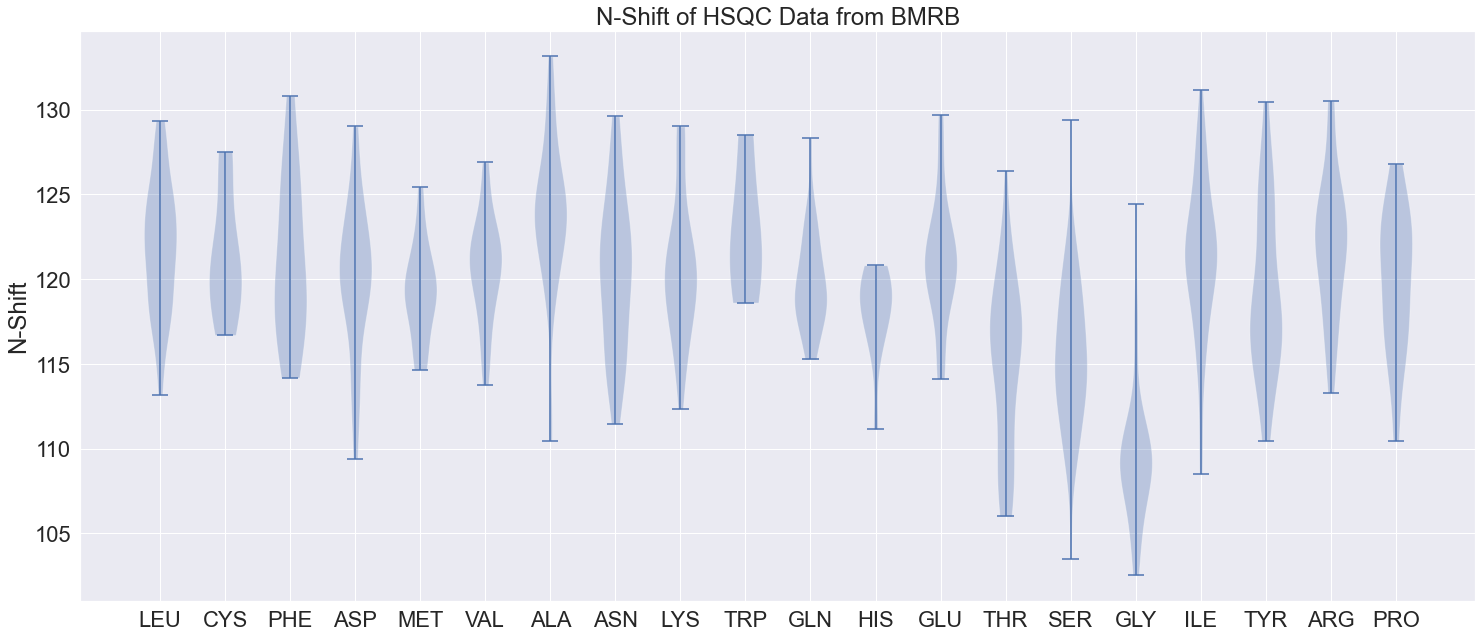

In [418]:
#get_violinplot(can_residue_N_dict, "N-Shift", './all_N_shifts_violinplot.png')


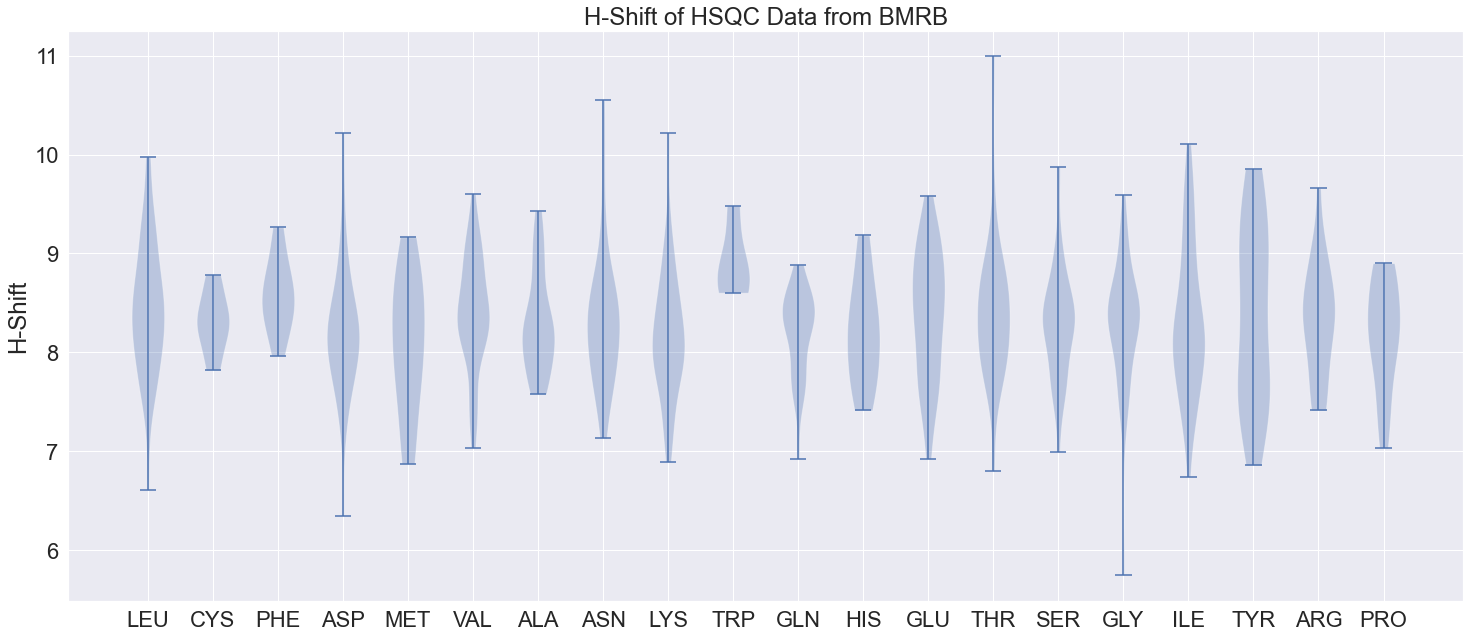

In [419]:
#get_violinplot(can_residue_H_dict, "H-Shift", './all_H_shifts_violinplot.png')

In [420]:
def get_boxplot(dictionary, atomshift, output):
    
    fig, ax = plt.subplots()
    ax.boxplot(dictionary.values())
    ax.set_xticklabels(dictionary.keys())
    fig.set_size_inches(25, 10.5)
    
    plt.ylabel(atomshift)
    plt.rcParams.update({'font.size': 17})
    plt.title(atomshift+" of HSQC Data from BMRB")

    fig.savefig(output, dpi=100)

In [487]:
def get_box_swarmplot(dictionary, atomshift, output, ylimit_start, ylim_end):
    
    fig, ax = plt.subplots()
    data = list(dictionary.values())
    
    sns.swarmplot(data=data, palette='dark:0.25')
    #sns.stripplot(data=data, palette='dark:0.25')
    ax = sns.boxplot(data=data)
    
    ax.set_xticklabels(dictionary.keys())
    fig.set_size_inches(25, 10.5)
    
    plt.ylabel(atomshift)
    plt.rcParams.update({'font.size': 17})
    plt.title(atomshift+" of HSQC Data from BMRB")
    plt.ylim(ylimit_start, ylim_end)
    #plt.xlim(0, 15)

    fig.savefig(output, dpi=100)
    
    

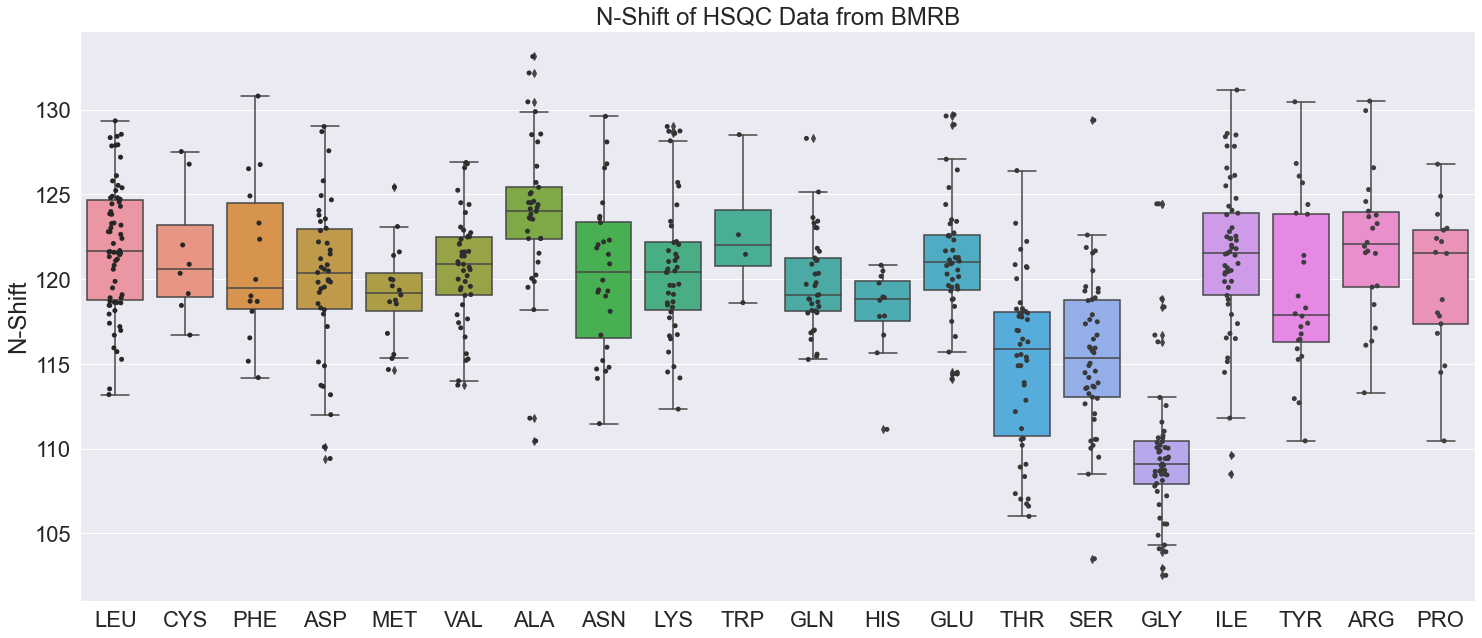

In [488]:
#get_box_swarmplot(can_residue_N_dict, "N-Shift", './all_N_shifts_box_swarmplot.png', 75, 150)

In [ ]:
#get_box_swarmplot(can_residue_H_dict, "H-Shift", './all_H_shifts_box_swarmplot.png',0, 15)

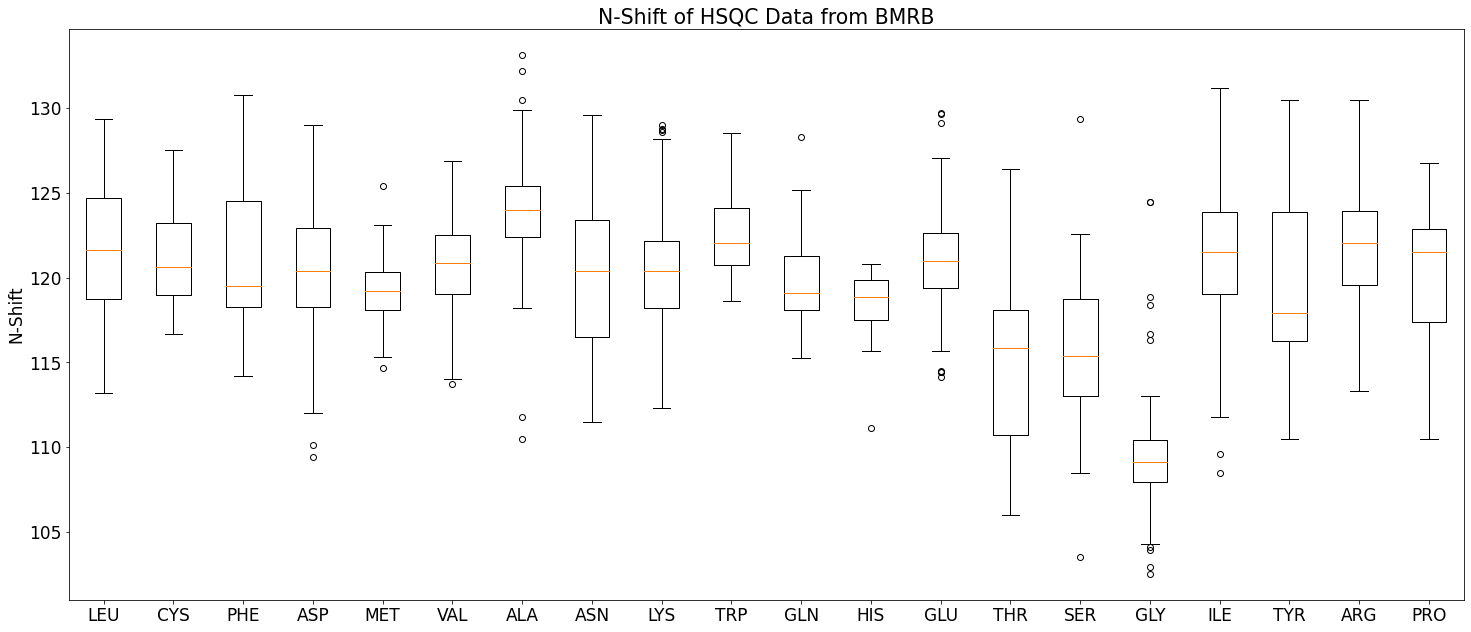

In [323]:
#get_boxplot(can_residue_N_dict, "N-Shift", './all_N_shifts_boxplot.png')

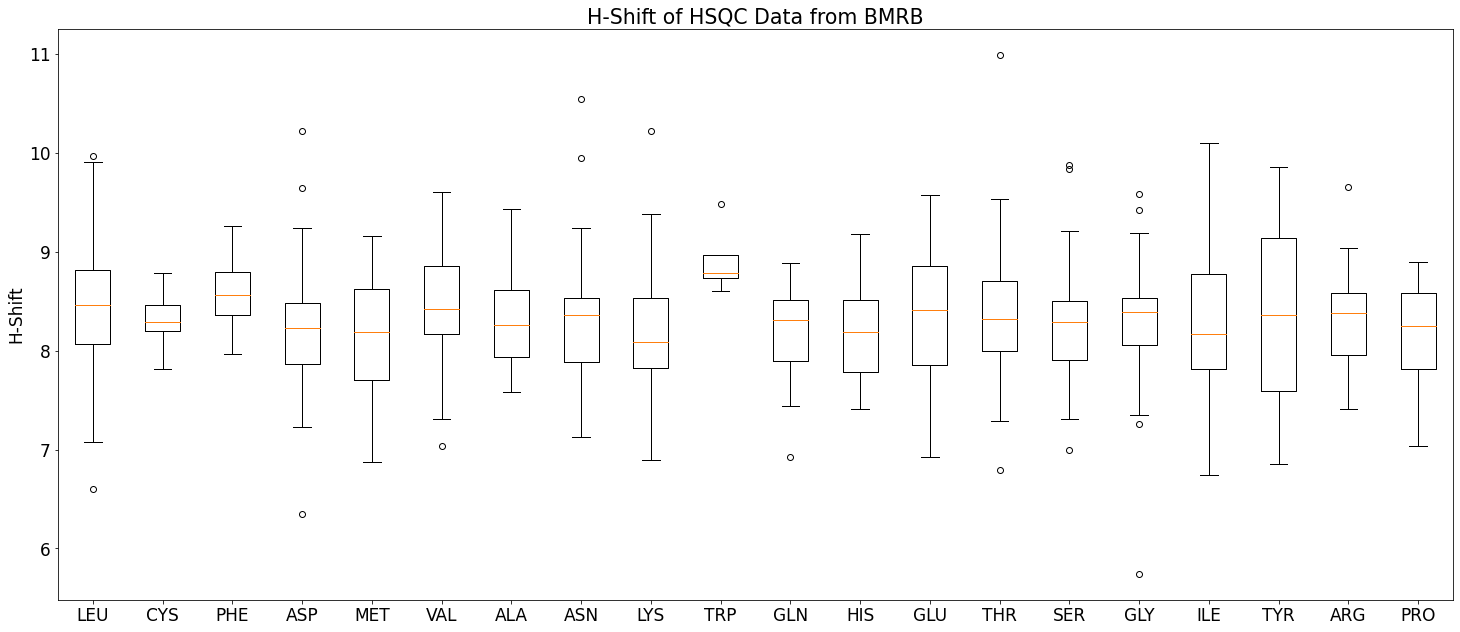

In [324]:
#get_boxplot(can_residue_H_dict, "H-Shift", './all_H_shifts_boxplot.png')

# DB Statistic Plots

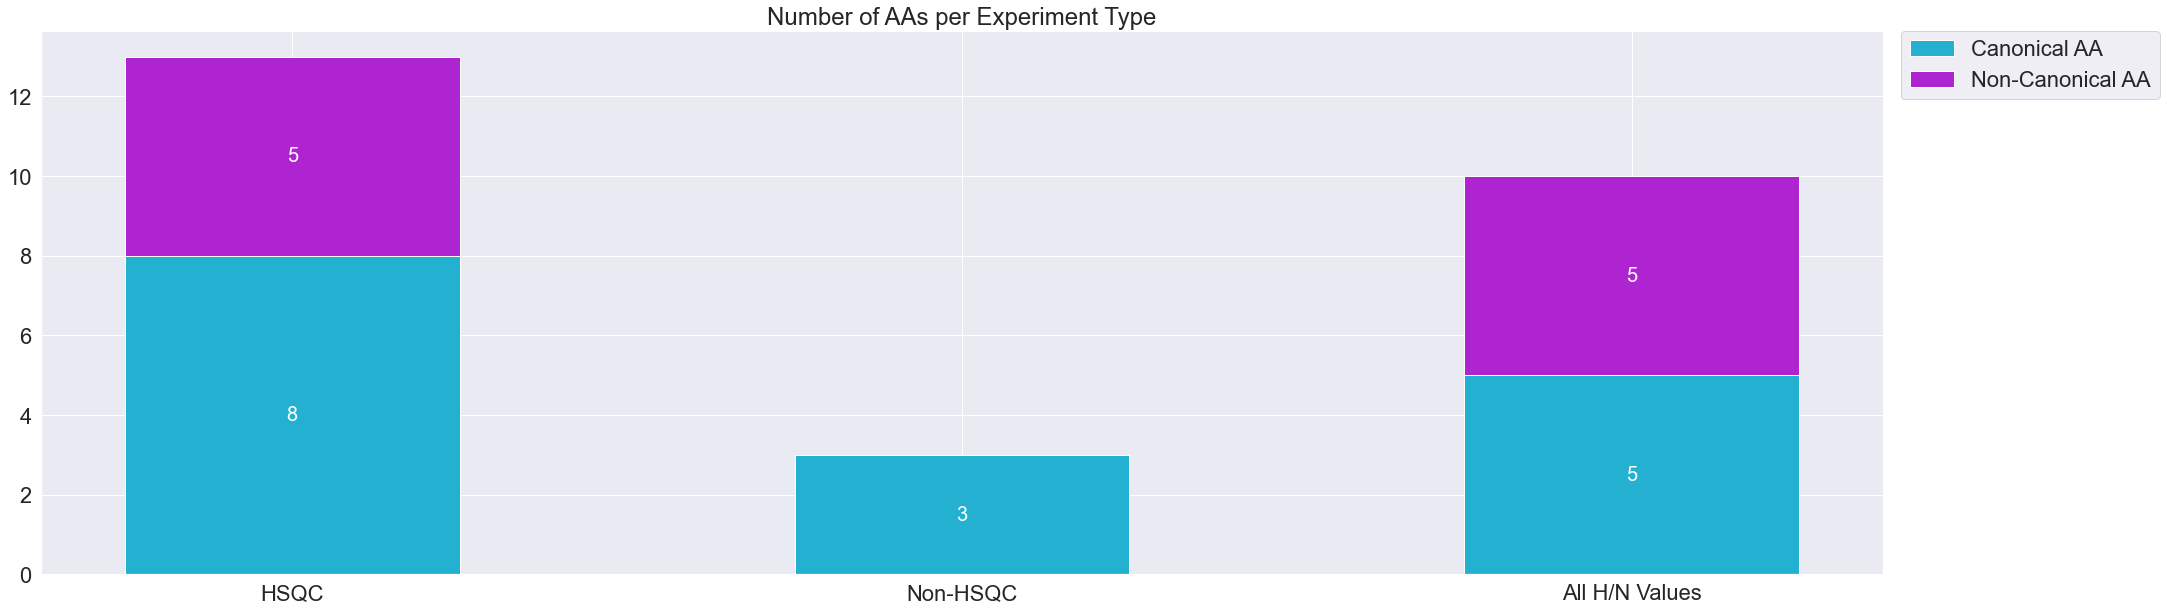

In [489]:
"""species = (
    "HSQC",
    "Non-HSQC",
    "All H/N Values"
)
weight_counts = {
    "Canonical AA": np.array([counter_canonical_hsqc, counter_canonical,counter_canonical_h_n]),
    "Non-Canonical AA": np.array([counter_non_canonical_hsqc, counter_non_canonical,counter_non_canonical_h_n]),
}
width = 0.5
colors = ['#24b1d1', '#ae24d1']

fig, ax = plt.subplots()
bottom = np.zeros(3)

i=0
for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom,color=colors[i])
    bottom += weight_count
    i += 1

    
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.0f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, color='w',ha='center', va='center', fontsize=20)

ax.set_title("Number of AAs per Experiment Type")
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)   
#ax.legend(loc="upper right")
fig.set_size_inches(33, 10)

#plt.rcParams.update({'font.size': 23})

plt.savefig('./canonical_AA_per_type.png', dpi=100)"""

In [117]:
# get keys from one of the dictionary
#ks = [k for k in can_residue_N_dict.keys()]


# call values from each dictionary on available keys
#data = {k: [{"x":can_residue_H_dict[k][idx],"y" :can_residue_N_dict[k][idx]} for idx in range(len(can_residue_N_dict[k]))] for k in ks}
#print(data)

<Figure size 432x288 with 0 Axes>

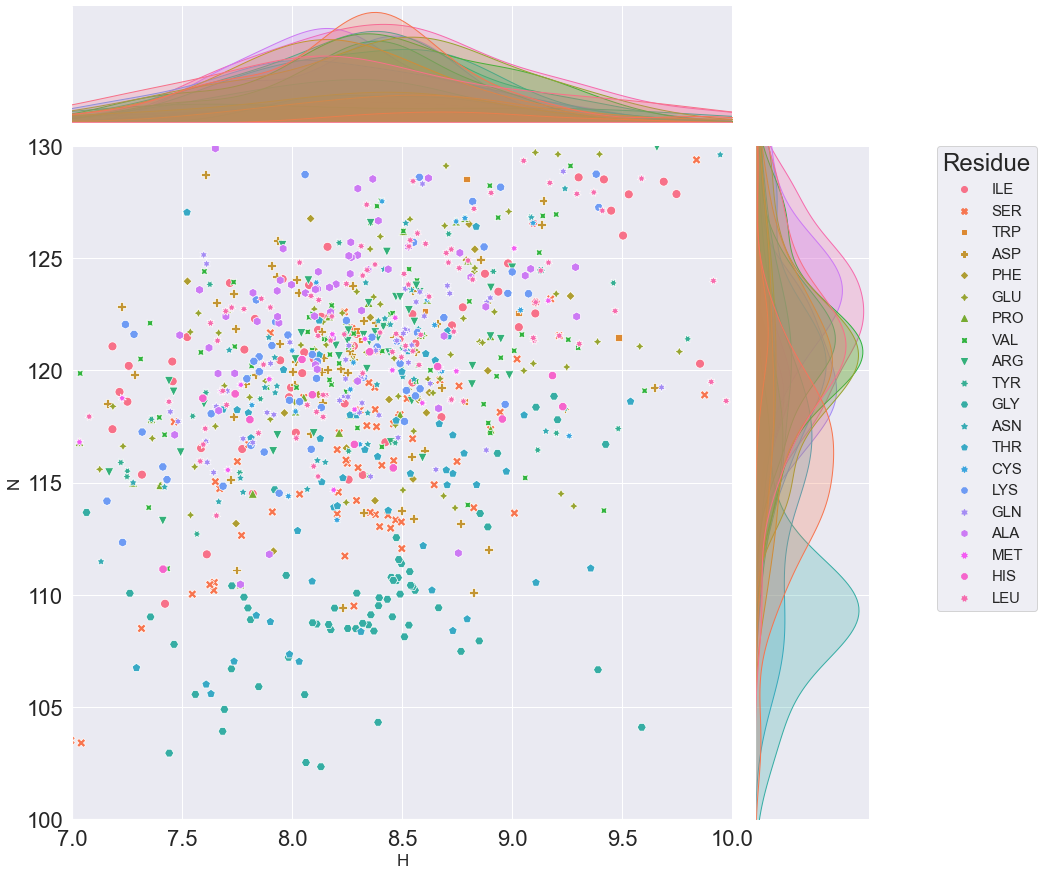

In [158]:
#data = {'A': [{'x': 1, 'y' : 2}, {'x': 2, 'y' : 3}, {'x': 3, 'y' : 4}], 'B': [{'x': 5, 'y' : 6}, {'x': 6, 'y' : 7}, {'x': 7, 'y' : 8}], 'C': [{'x': 10, 'y' : 11}, {'x': 11, 'y' : 12}, {'x': 12, 'y' : 13}]}

"""x, y, group = [], [], []
for i in data:
    for j in data[i]:
        x.append(j['x'])
        y.append(j['y'])
        group.append(i)
        
plt.figure()#figsize=(40,40)
custom_palette = sns.color_palette("husl", 20)


sns.jointplot(x = x, y = y, hue = group,palette=custom_palette , style=group, s=80, height=12, xlim = (0, 15), ylim = (75, 150))

plt.legend(title='Residue',bbox_to_anchor=(1.31, 1), loc='upper left', borderaxespad=0.,fontsize=15)
plt.xlabel("H",fontsize=17)
plt.ylabel("N",fontsize=17)




#plt.ylim(75, 150)
#plt.xlim(0, 15)

#title = 'Simulated H-N peak positions'
#plt.title(title,fontsize=20)


plt.savefig("./all_h_n_scatterplot_new.png", bbox_inches='tight')
plt.show()"""

doubled polymers: 0
[]


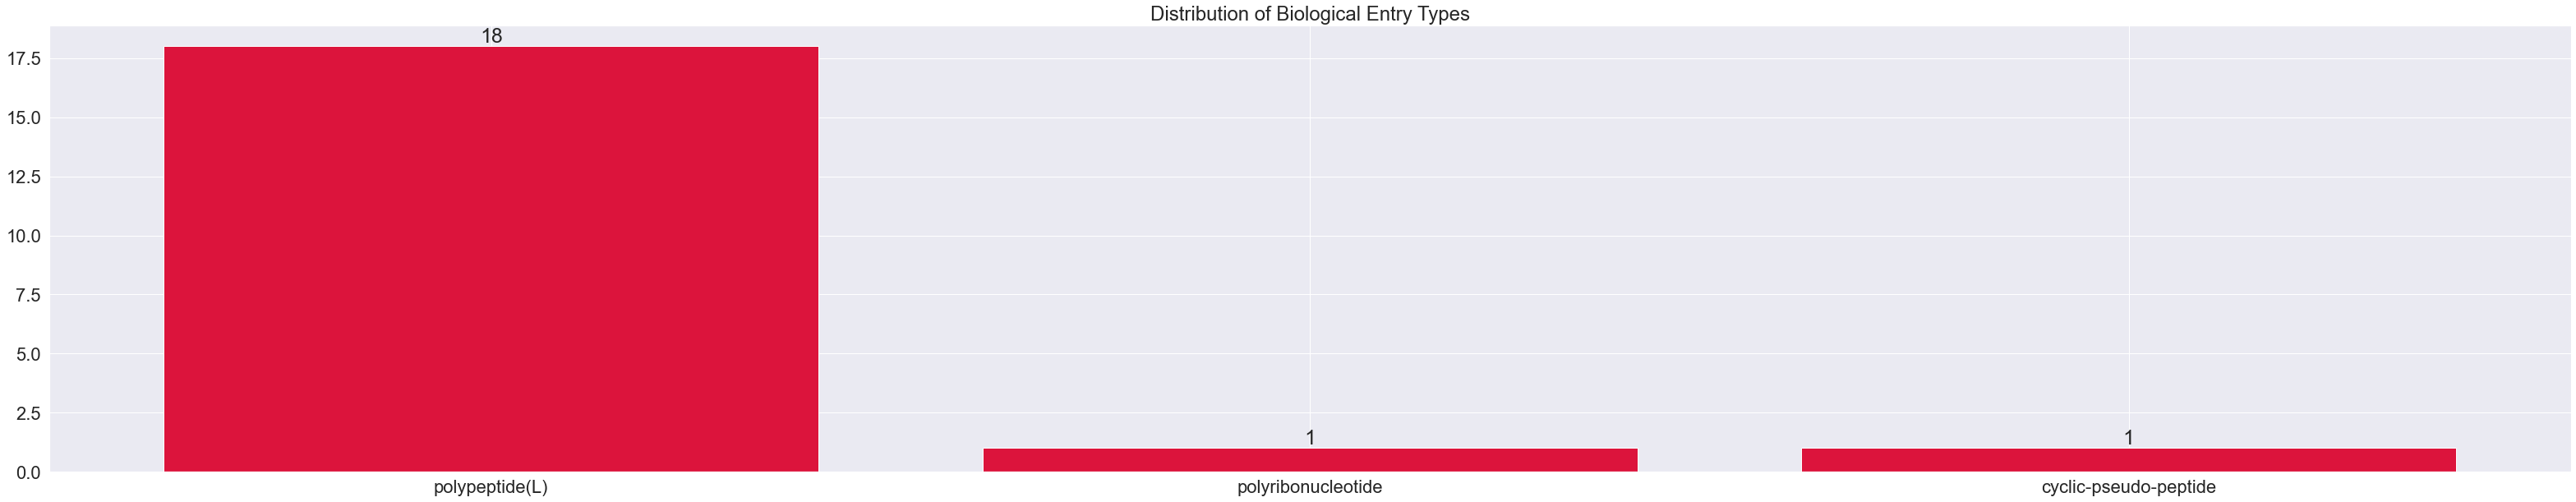

<Figure size 432x288 with 0 Axes>

In [168]:
#s = set()
"""l = []

for key,value in polymer_dict.items():
    #s.update(value)
    l.extend(value)
#print(len(s))
#nt(len(l))
#print(len(l))


import collections
doubles = [x for x, y in collections.Counter(l).items() if y > 1]
print("doubled polymers: "+str(len(doubles)))
#print(doubles)


tmp_dict = {}
for key,value in polymer_dict.items():
    tmp_dict[key] = sum(1 for v in value if v)
    

plt.figure(figsize=(55, 10))

x = tmp_dict.keys()
height = tmp_dict.values()
bar = plt.bar(x, height, color='crimson')

plt.title("Distribution of Biological Entry Types")

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/ 2.0 , height, f'{height:.0f}', ha='center', va='bottom',fontsize=25)


plt.show()
plt.savefig('./distribution_entry_types.png', dpi=100, bbox_inches='tight')"""

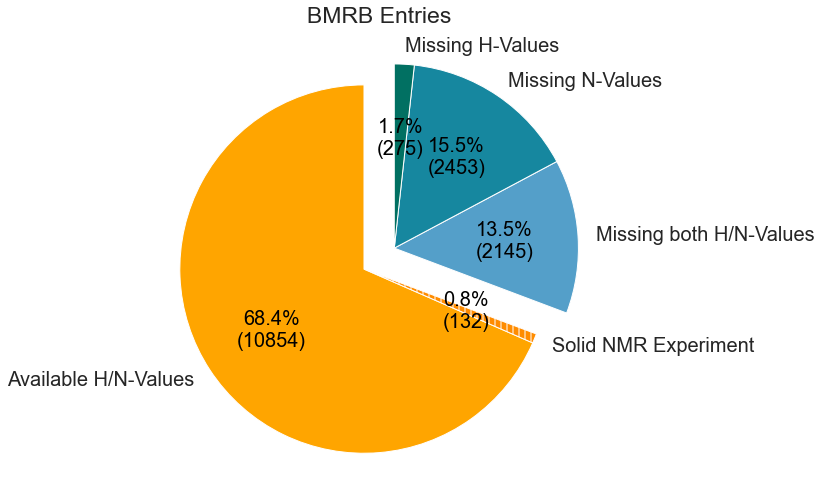

In [343]:
def get_pie_chart():

    fig, ax = plt.subplots(figsize=(10, 7))

    ax.set_aspect('equal')

    data = [10854, 132 ,2145, 2453, 276]
    labels = ['Available H/N-Values', 'Solid NMR Experiment','Missing both H/N-Values', 'Missing N-Values',
                'Missing H-Values']

     # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d})".format(pct, absolute) 

    cmap = plt.get_cmap('PuBuGn')
    color_3 = list(cmap(np.linspace(0.55, 0.85, len(x))))
    #print(colors)
    # Swap in a bright blue for the Lacrosse color.
    colors = ('orange','darkorange', color_3[0], color_3[1], color_3[2])


    wedges, texts, percs = ax.pie(data, labels=labels, autopct=lambda pct: func(pct, data),startangle=90,textprops={'size': '20'}, 
                                  colors = colors, hatch=['', '||', '', '',''])

    groups = [[0, 1], [2, 3, 4]]
    radfraction = 0.1
    for group in groups:
        ang = np.deg2rad((wedges[group[-1]].theta2 + wedges[group[0]].theta1) / 2)
        for j in group:
            center = radfraction * wedges[j].r * np.array([np.cos(ang), np.sin(ang)])
            wedges[j].set_center(center)
            texts[j].set_position(np.array(texts[j].get_position()) + center)
            percs[j].set_position(np.array(percs[j].get_position()) + center)

    #ax.autoscale(True)

    plt.setp(percs, color='black',fontsize=20) #fontweight='bold'
    plt.setp(texts, fontweight=500)

    ax.set_title('BMRB Entries', fontsize=23)
    plt.tight_layout()


    #plt.show()
    plt.savefig('./pie_chart_bmrb_entries_missing.png',  bbox_inches='tight')
    
#get_pie_chart() 